<a href="https://colab.research.google.com/github/sourashankar/ML_INX_Future_Inc_22.9.2024/blob/main/INX_Future_Inc_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EMPLOYEE PERFORMANCE ANALYSIS

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/Kanth_5.9.2024/ML projects /1_INX Future Inc/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).csv"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
data = pd.read_csv(file_path, encoding='ISO-8859-1')


In [ ]:
display(data.head())

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [ ]:
#Features present in the dataset¶
#1-EmpNumber

#2-Age

#3-Gender

#4-EducationBackground

#5-MaritalStatus

#6-EmpDepartment

#7-EmpJobRole

#8-BusinessTravelFrequency

#9-DistanceFromHome

#10-EmpEducationLevel

#11-EmpEnvironmentSatisfaction

#12-EmpHourlyRate

#13-EmpJobInvolvement

#14-EmpJobLevel

#15-EmpJobSatisfaction

#16-NumCompaniesWorked

#17-OverTime

#18-EmpLastSalaryHikePercent

#19-EmpRelationshipSatisfaction

#20-TotalWorkExperienceInYears

#21-TrainingTimesLastYear

#22-EmpWorkLifeBalance

#23-ExperienceYearsAtThisCompany

#24-ExperienceYearsInCurrentRole

#25-YearsSinceLastPromotion

#26-YearsWithCurrManager

#27-Attrition

#28-PerformanceRating

In [ ]:
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [ ]:
#Exploring the dataset¶
#Exploratory Data Analysis

In [ ]:
data.shape

(1200, 28)

In [ ]:
data.head(5)

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [ ]:
data.tail(5)

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [ ]:
data.tail(5)



EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [ ]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [ ]:
# Returns basic information on all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [ ]:
# Returns basic statistics on numeric columns
data.describe().T

count       mean        std   min   25%   50%  \
Age                           1200.0  36.918333   9.087289  18.0  30.0  36.0   
DistanceFromHome              1200.0   9.165833   8.176636   1.0   2.0   7.0   
EmpEducationLevel             1200.0   2.892500   1.044120   1.0   2.0   3.0   
EmpEnvironmentSatisfaction    1200.0   2.715833   1.090599   1.0   2.0   3.0   
EmpHourlyRate                 1200.0  65.981667  20.211302  30.0  48.0  66.0   
EmpJobInvolvement             1200.0   2.731667   0.707164   1.0   2.0   3.0   
EmpJobLevel                   1200.0   2.067500   1.107836   1.0   1.0   2.0   
EmpJobSatisfaction            1200.0   2.732500   1.100888   1.0   2.0   3.0   
NumCompaniesWorked            1200.0   2.665000   2.469384   0.0   1.0   2.0   
EmpLastSalaryHikePercent      1200.0  15.222500   3.625918  11.0  12.0  14.0   
EmpRelationshipSatisfaction   1200.0   2.725000   1.075642   1.0   2.0   3.0   
TotalWorkExperienceInYears    1200.0  11.330000   7.797228   0.0   6.0  10.0   
TrainingTimesLastYear         1200.0   2.785833   1.263446   0.0   2.0   3.0   
EmpWorkLifeBalance            1200.0   2.744167   0.699374   1.0   2.0   3.0   
ExperienceYearsAtThisCompany  1200.0   7.077500   6.236899   0.0   3.0   5.0   
ExperienceYearsInCurrentRole  1200.0   4.291667   3.613744   0.0   2.0   3.0   
YearsSinceLastPromotion       1200.0   2.194167   3.221560   0.0   0.0   1.0   
YearsWithCurrManager          1200.0   4.105000   3.541576   0.0   2.0   3.0   
PerformanceRating             1200.0   2.948333   0.518866   2.0   3.0   3.0   

                               75%    max  
Age                           43.0   60.0  
DistanceFromHome              14.0   29.0  
EmpEducationLevel              4.0    5.0  
EmpEnvironmentSatisfaction     4.0    4.0  
EmpHourlyRate                 83.0  100.0  
EmpJobInvolvement              3.0    4.0  
EmpJobLevel                    3.0    5.0  
EmpJobSatisfaction             4.0    4.0  
NumCompaniesWorked             4.0    9.0  
EmpLastSalaryHikePercent      18.0   25.0  
EmpRelationshipSatisfaction    4.0    4.0  
TotalWorkExperienceInYears    15.0   40.0  
TrainingTimesLastYear          3.0    6.0  
EmpWorkLifeBalance             3.0    4.0  
ExperienceYearsAtThisCompany  10.0   40.0  
ExperienceYearsInCurrentRole   7.0   18.0  
YearsSinceLastPromotion        3.0   15.0  
YearsWithCurrManager           7.0   17.0  
PerformanceRating              3.0    4.0

In [ ]:
# Returns different datatypes for each columns
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
Attrition                       object
PerformanceRating                int64
dtype: object

In [ ]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [ ]:
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [ ]:
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

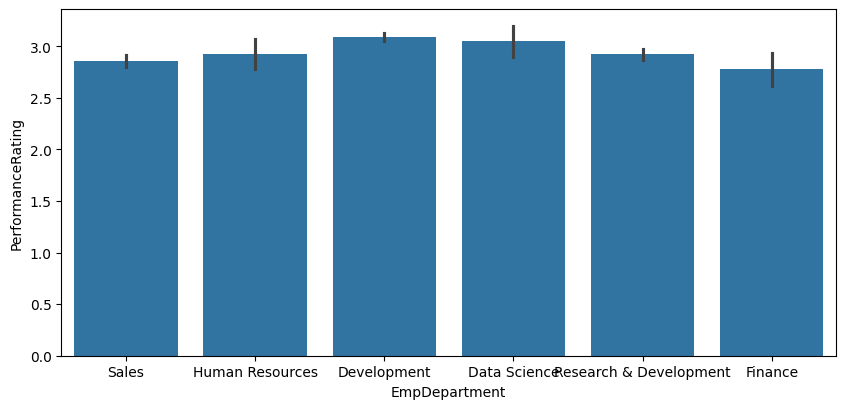

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4.5))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=dept_per)
plt.show()


In [ ]:
# Analyze all department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [ ]:
# Creating new Dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

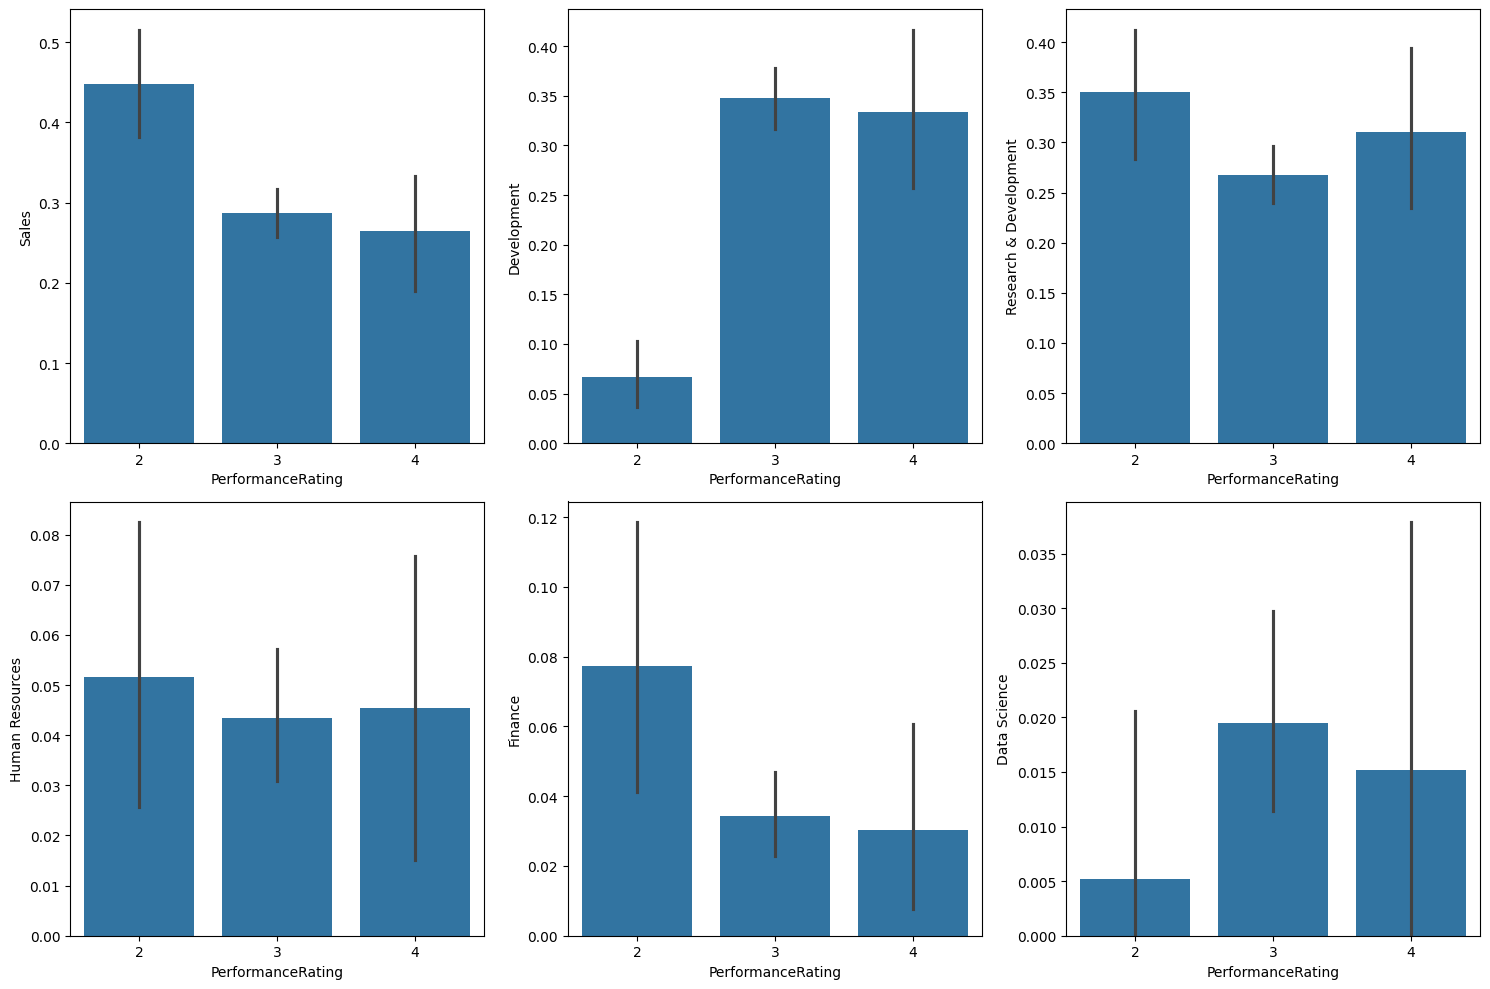

In [ ]:
# Plotting separate bar graph for performance of each department using seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# First subplot
plt.subplot(2, 3, 1)
sns.barplot(x='PerformanceRating', y='Sales', data=dept_rating)

# Second subplot
plt.subplot(2, 3, 2)
sns.barplot(x='PerformanceRating', y='Development', data=dept_rating)

# Third subplot
plt.subplot(2, 3, 3)
sns.barplot(x='PerformanceRating', y='Research & Development', data=dept_rating)

# Fourth subplot
plt.subplot(2, 3, 4)
sns.barplot(x='PerformanceRating', y='Human Resources', data=dept_rating)

# Fifth subplot
plt.subplot(2, 3, 5)
sns.barplot(x='PerformanceRating', y='Finance', data=dept_rating)

# Sixth subplot
plt.subplot(2, 3, 6)
sns.barplot(x='PerformanceRating', y='Data Science', data=dept_rating)

plt.tight_layout()  # To avoid overlap
plt.show()


In [ ]:
# Correlation Plot

In [ ]:
print(data.dtypes)

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [ ]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')


In [ ]:
data_numeric = data.select_dtypes(include=[np.number])


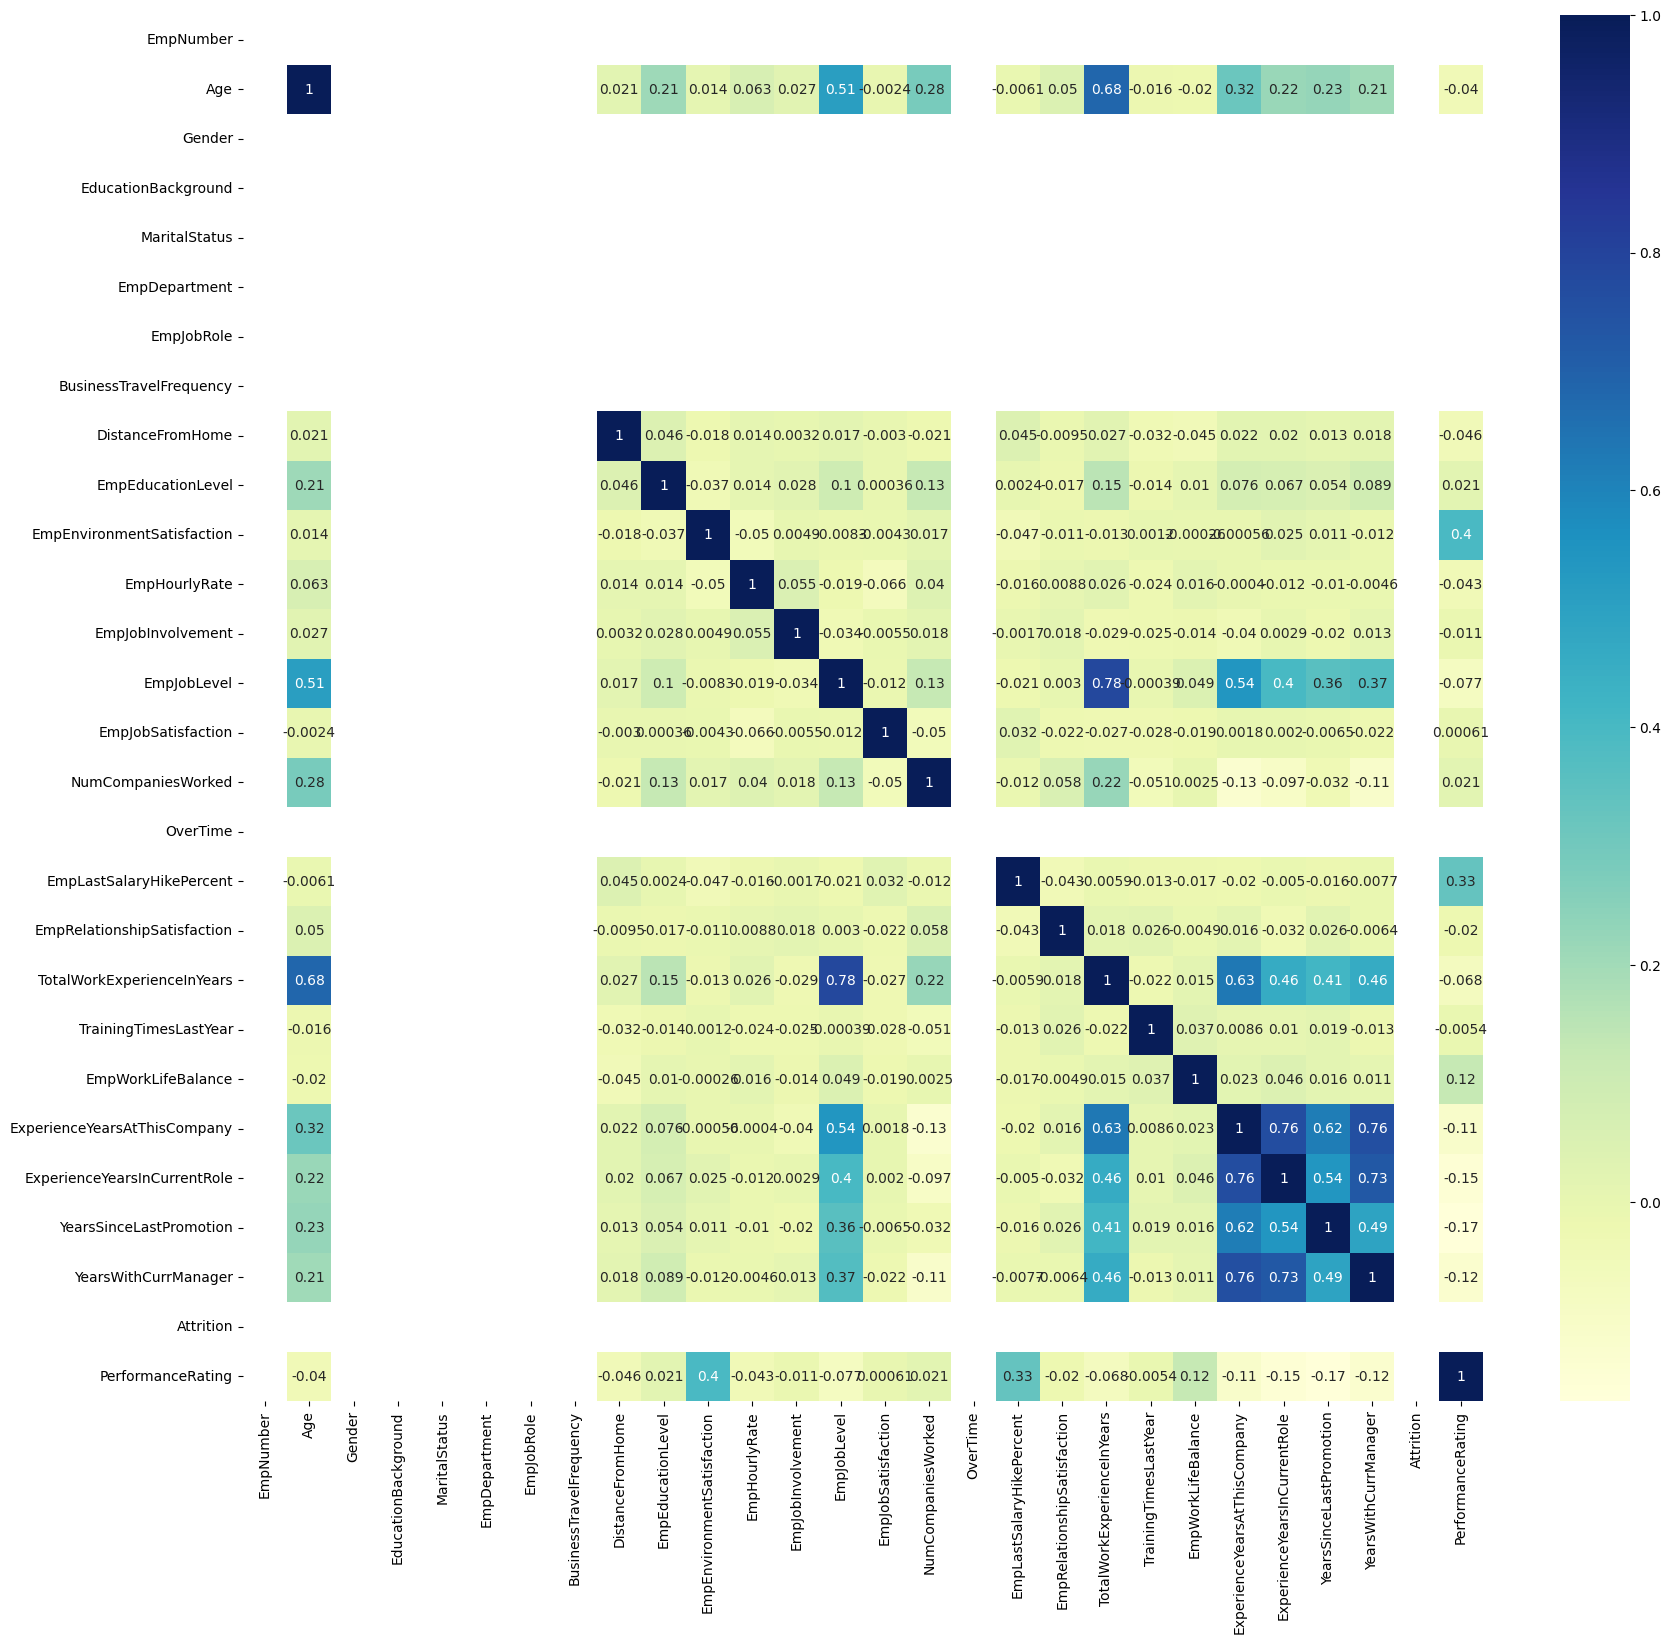

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 18))
sns.heatmap(data_numeric.corr(), cmap='YlGnBu', annot=True)
plt.show()


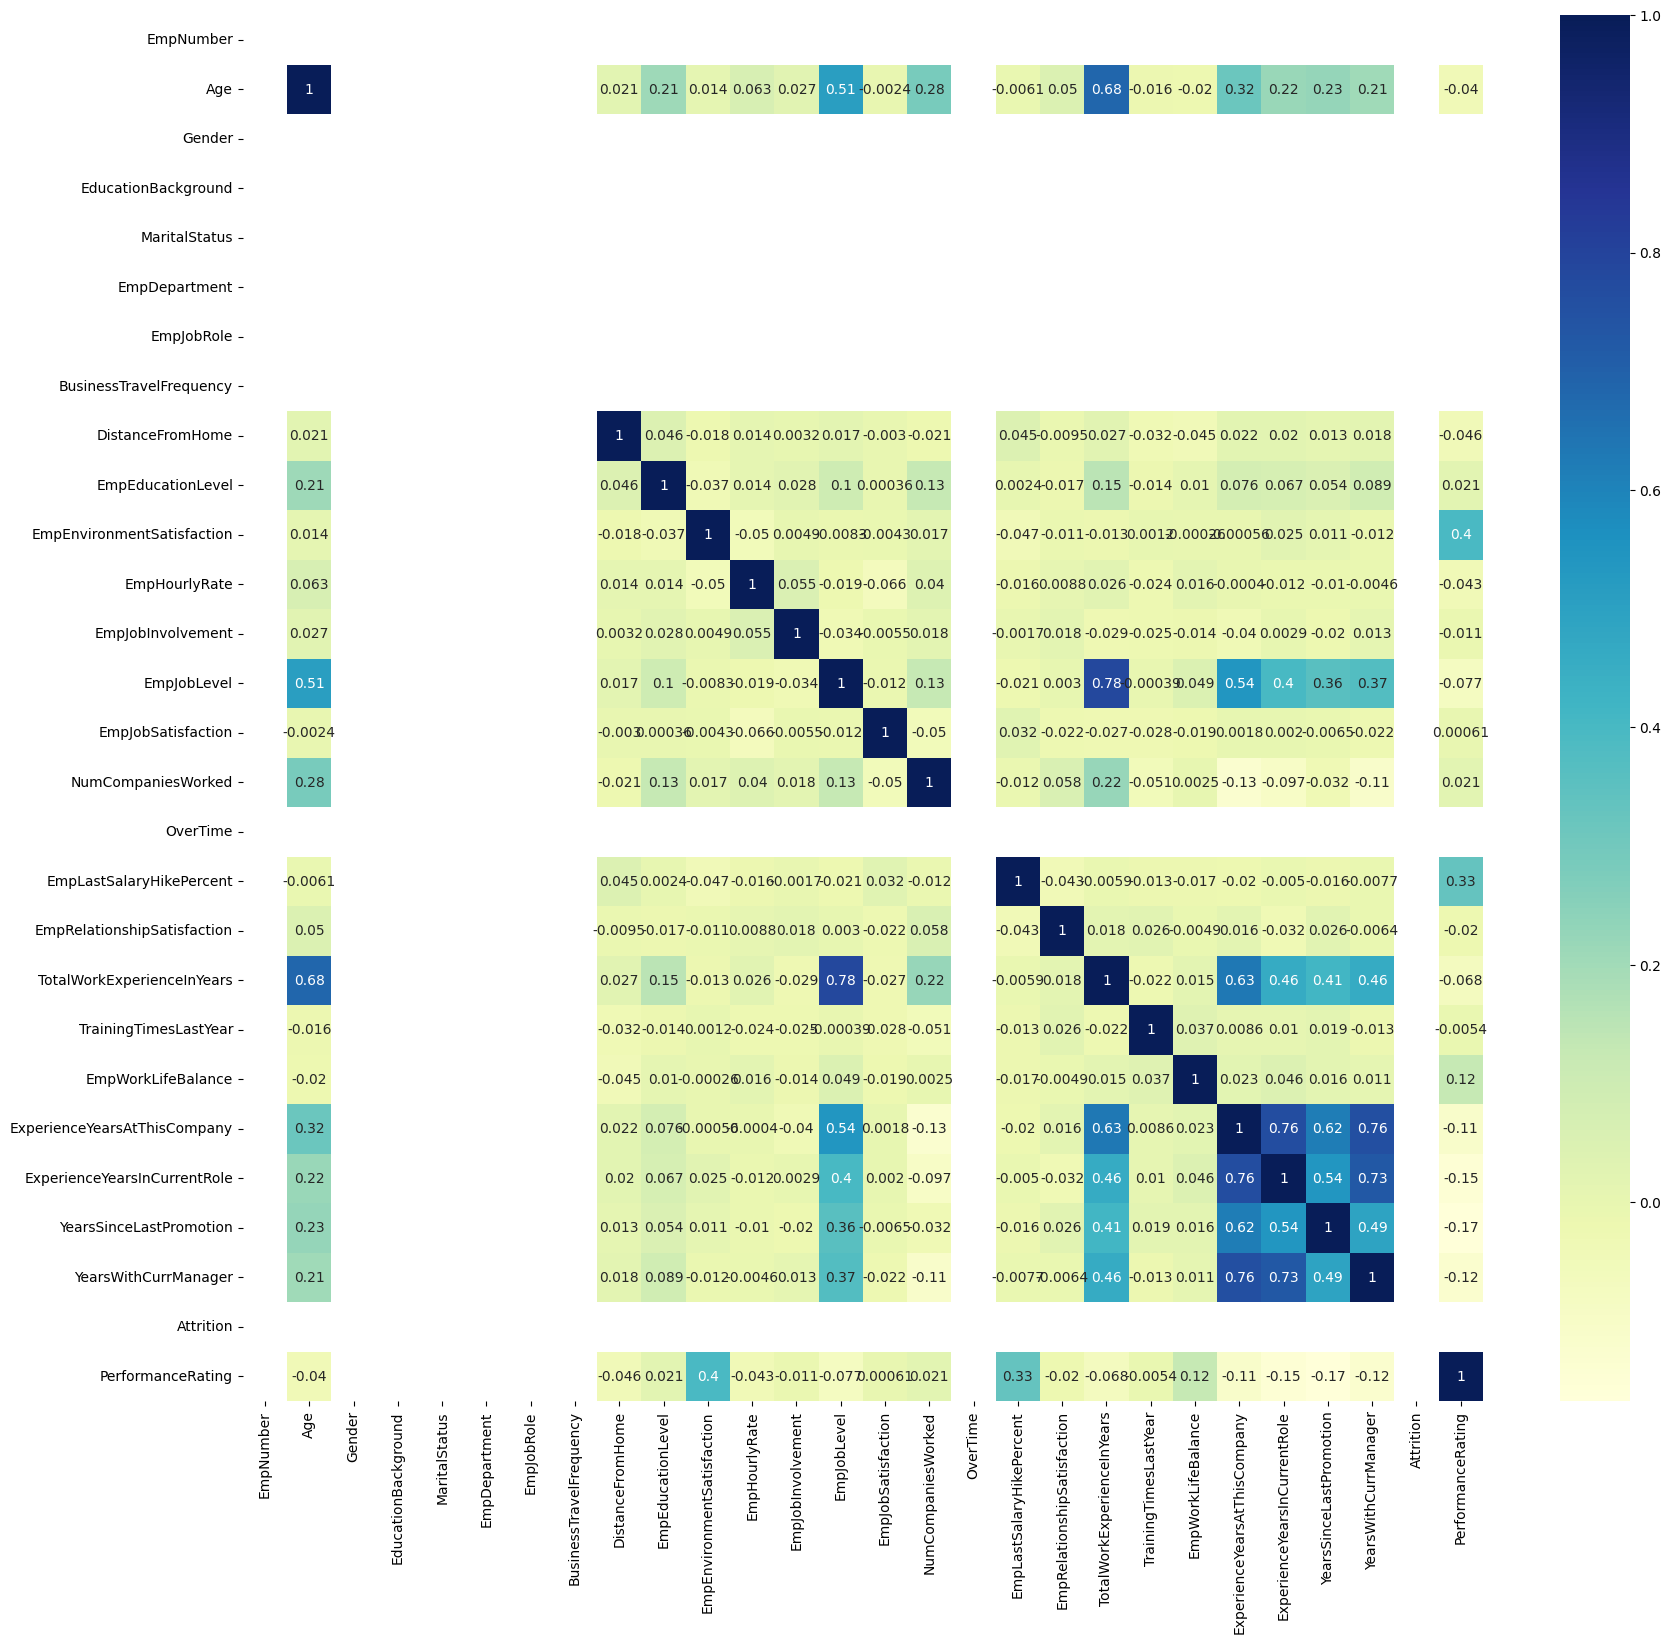

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()

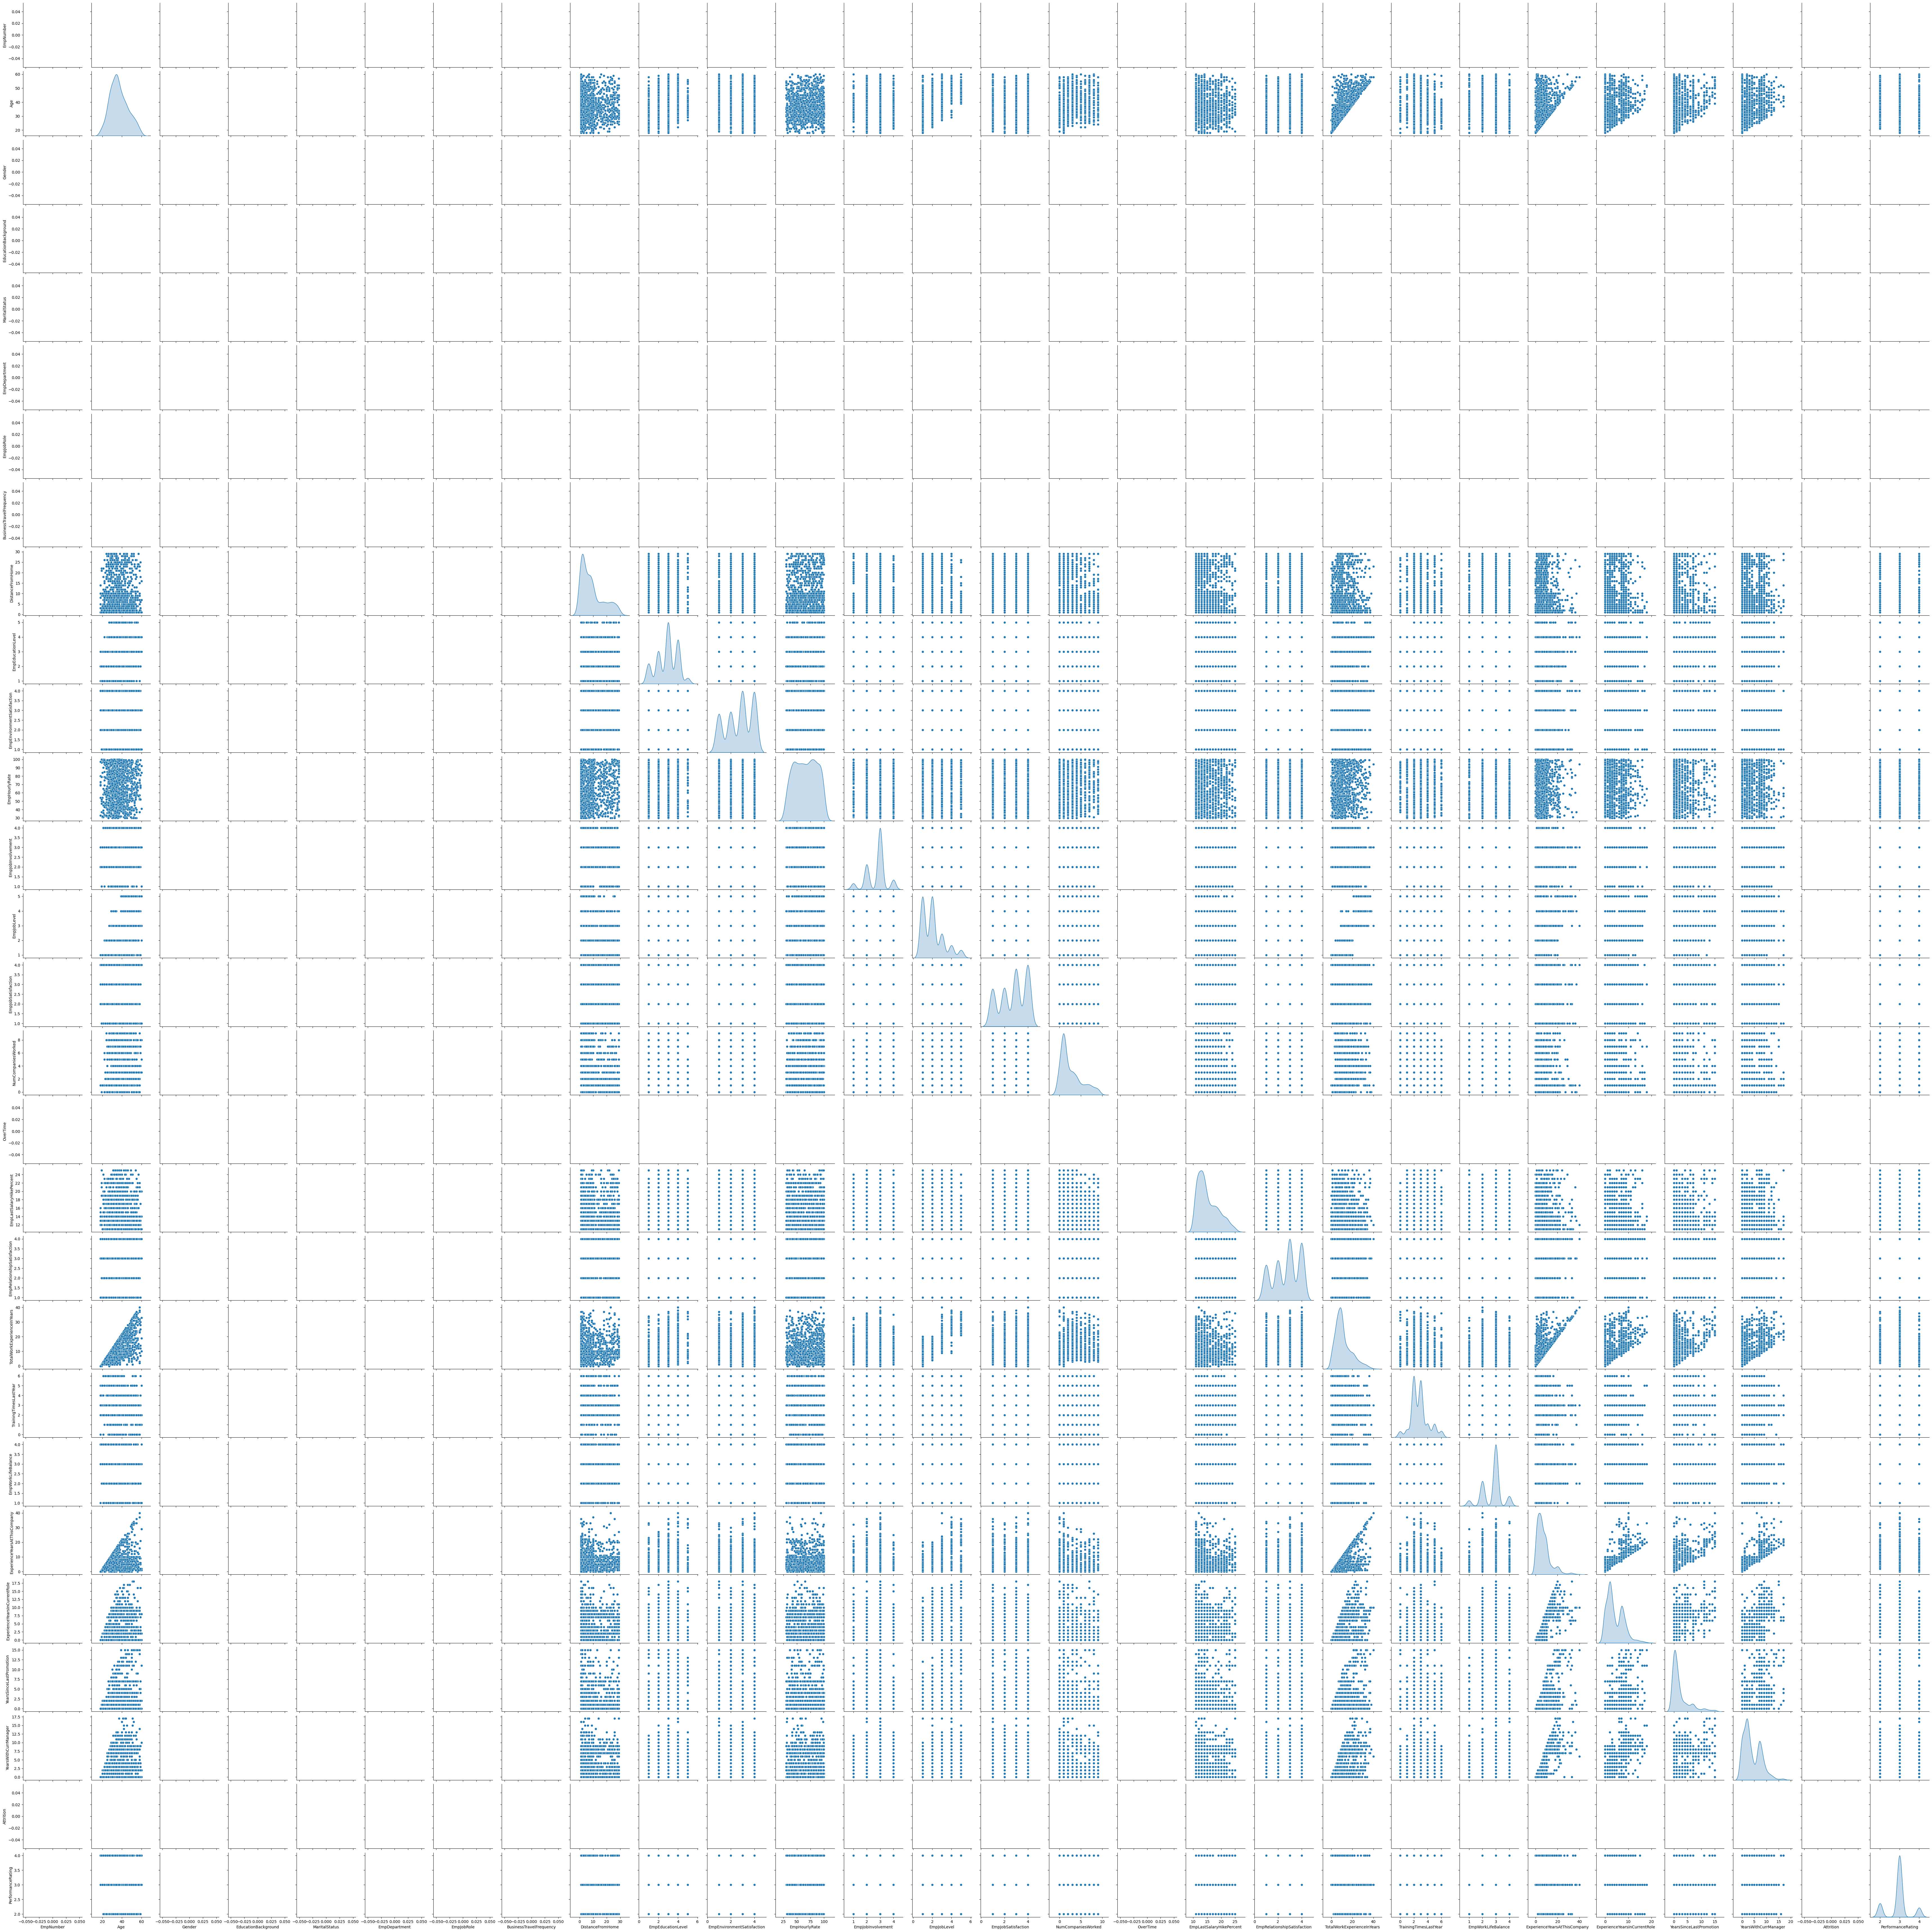

In [ ]:
sns.pairplot(data, diag_kind='kde')

In [ ]:
# Data Encoding/Data wrangling

In [ ]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0        NaN   32     0.0                  0.0            0.0            0.0   
1        NaN   47     0.0                  0.0            0.0            0.0   
2        NaN   40     0.0                  0.0            0.0            0.0   
3        NaN   41     0.0                  0.0            0.0            0.0   
4        NaN   60     0.0                  0.0            0.0            0.0   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0         0.0                      0.0                10                  3   
1         0.0                      0.0                14                  4   
2         0.0                      0.0                 5                  4   
3         0.0                      0.0                10                  4   
4         0.0                      0.0                16                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   
2  ...                            3                          20   
3  ...                            2                          23   
4  ...                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8        0.0                  3  
1                     7        0.0                  3  
2                    12        0.0                  4  
3                     6        0.0                  3  
4                     2        0.0                  3  

[5 rows x 28 columns]

In [ ]:
#Feature Selection

In [ ]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr()

EmpNumber       Age  Gender  \
EmpNumber                           NaN       NaN     NaN   
Age                                 NaN  1.000000     NaN   
Gender                              NaN       NaN     NaN   
EducationBackground                 NaN       NaN     NaN   
MaritalStatus                       NaN       NaN     NaN   
EmpDepartment                       NaN       NaN     NaN   
EmpJobRole                          NaN       NaN     NaN   
BusinessTravelFrequency             NaN       NaN     NaN   
DistanceFromHome                    NaN  0.020937     NaN   
EmpEducationLevel                   NaN  0.207313     NaN   
EmpEnvironmentSatisfaction          NaN  0.013814     NaN   
EmpHourlyRate                       NaN  0.062867     NaN   
EmpJobInvolvement                   NaN  0.027216     NaN   
EmpJobLevel                         NaN  0.509139     NaN   
EmpJobSatisfaction                  NaN -0.002436     NaN   
NumCompaniesWorked                  NaN  0.284408     NaN   
OverTime                            NaN       NaN     NaN   
EmpLastSalaryHikePercent            NaN -0.006105     NaN   
EmpRelationshipSatisfaction         NaN  0.049749     NaN   
TotalWorkExperienceInYears          NaN  0.680886     NaN   
TrainingTimesLastYear               NaN -0.016053     NaN   
EmpWorkLifeBalance                  NaN -0.019563     NaN   
ExperienceYearsAtThisCompany        NaN  0.318852     NaN   
ExperienceYearsInCurrentRole        NaN  0.217163     NaN   
YearsSinceLastPromotion             NaN  0.228199     NaN   
YearsWithCurrManager                NaN  0.205098     NaN   
Attrition                           NaN       NaN     NaN   
PerformanceRating                   NaN -0.040164     NaN   

                              EducationBackground  MaritalStatus  \
EmpNumber                                     NaN            NaN   
Age                                           NaN            NaN   
Gender                                        NaN            NaN   
EducationBackground                           NaN            NaN   
MaritalStatus                                 NaN            NaN   
EmpDepartment                                 NaN            NaN   
EmpJobRole                                    NaN            NaN   
BusinessTravelFrequency                       NaN            NaN   
DistanceFromHome                              NaN            NaN   
EmpEducationLevel                             NaN            NaN   
EmpEnvironmentSatisfaction                    NaN            NaN   
EmpHourlyRate                                 NaN            NaN   
EmpJobInvolvement                             NaN            NaN   
EmpJobLevel                                   NaN            NaN   
EmpJobSatisfaction                            NaN            NaN   
NumCompaniesWorked                            NaN            NaN   
OverTime                                      NaN            NaN   
EmpLastSalaryHikePercent                      NaN            NaN   
EmpRelationshipSatisfaction                   NaN            NaN   
TotalWorkExperienceInYears                    NaN            NaN   
TrainingTimesLastYear                         NaN            NaN   
EmpWorkLifeBalance                            NaN            NaN   
ExperienceYearsAtThisCompany                  NaN            NaN   
ExperienceYearsInCurrentRole                  NaN            NaN   
YearsSinceLastPromotion                       NaN            NaN   
YearsWithCurrManager                          NaN            NaN   
Attrition                                     NaN            NaN   
PerformanceRating                             NaN            NaN   

                              EmpDepartment  EmpJobRole  \
EmpNumber                               NaN         NaN   
Age                                     NaN         NaN   
Gender                                  NaN         NaN   
EducationBackground                     NaN        

In [ ]:
# COMMENTS

In [ ]:
# Dropping the first columns as it is of no use for analysis.
data.drop(['EmpNumber'],inplace=True,axis=1)

In [ ]:
# Selected only the important columns
y = data.PerformanceRating
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()


EmpDepartment  EmpJobRole  EmpEnvironmentSatisfaction  \
0            0.0         0.0                           4   
1            0.0         0.0                           4   
2            0.0         0.0                           4   
3            0.0         0.0                           2   
4            0.0         0.0                           1   

   EmpLastSalaryHikePercent  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                        12                   2                            10   
1                        12                   3                             7   
2                        21                   3                            18   
3                        15                   2                            21   
4                        14                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                             7                        0                     8  
1                             7                        1                     7  
2                            13                        1                    12  
3                             6                       12                     6  
4                             2                        2                     2

In [ ]:
#Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((960, 9), (240, 9), (960,), (240,))

In [ ]:
#Feature Scaling

In [ ]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((960, 9), (240, 9))

In [ ]:
# Modeling

In [ ]:
#1. Logistic Regression

In [ ]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Predicting the model
y_predict_lr = model_lr.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_lr))
print(classification_report(y_test,y_predict_lr))

0.8291666666666667
              precision    recall  f1-score   support

           2       0.58      0.37      0.45        38
           3       0.85      0.93      0.89       179
           4       0.90      0.78      0.84        23

    accuracy                           0.83       240
   macro avg       0.78      0.69      0.73       240
weighted avg       0.81      0.83      0.82       240



In [ ]:
confusion_matrix(y_test,y_predict_lr)

array([[ 14,  24,   0],
       [ 10, 167,   2],
       [  0,   5,  18]])

In [ ]:
lr= accuracy_score(y_test,y_predict_lr)

In [ ]:
# 2. Support Vector Machine

In [ ]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [ ]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8541666666666666
              precision    recall  f1-score   support

           2       0.64      0.66      0.65        38
           3       0.90      0.91      0.91       179
           4       0.85      0.74      0.79        23

    accuracy                           0.85       240
   macro avg       0.80      0.77      0.78       240
weighted avg       0.85      0.85      0.85       240



In [ ]:
confusion_matrix(y_test,y_predict_svm)

array([[ 25,  13,   0],
       [ 13, 163,   3],
       [  1,   5,  17]])

In [ ]:
svm= accuracy_score(y_test,y_predict_svm)

In [ ]:
#3 . Decision Tree with GridSearchCV

In [ ]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dt=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_dt_grid=GridSearchCV(estimator=classifier_dt, param_grid=parameters, scoring='accuracy',cv=10)
model_dt_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [ ]:
model_dt_grid.best_params_

{'criterion': 'gini', 'min_samples_split': 4}

In [ ]:
# Predicting the model
y_predict_dt = model_dt_grid.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dt))
print(classification_report(y_test,y_predict_dt))

0.875
              precision    recall  f1-score   support

           2       0.73      0.63      0.68        38
           3       0.90      0.94      0.92       179
           4       0.90      0.78      0.84        23

    accuracy                           0.88       240
   macro avg       0.84      0.78      0.81       240
weighted avg       0.87      0.88      0.87       240



In [ ]:
confusion_matrix(y_test,y_predict_dt)

array([[ 24,  14,   0],
       [  9, 168,   2],
       [  0,   5,  18]])

In [ ]:
dt_grid= accuracy_score(y_test,y_predict_dt)

In [ ]:
#4. Random Forest with GridSearchCV

In [ ]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_rf_grid=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_rf_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [ ]:
model_rf_grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5}

In [ ]:
# Predicting the model
y_predict_rf = model_rf_grid.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9041666666666667
              precision    recall  f1-score   support

           2       0.75      0.87      0.80        38
           3       0.94      0.93      0.94       179
           4       0.90      0.78      0.84        23

    accuracy                           0.90       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.91      0.90      0.91       240



In [ ]:
confusion_matrix(y_test,y_predict_rf)

array([[ 33,   5,   0],
       [ 11, 166,   2],
       [  0,   5,  18]])

In [ ]:
rf_grid= accuracy_score(y_test,y_predict_rf)

In [ ]:
# 5. Naive Bayes Bernoulli¶

In [ ]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [ ]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.7833333333333333
              precision    recall  f1-score   support

           2       0.59      0.61      0.60        38
           3       0.82      0.92      0.87       179
           4       0.00      0.00      0.00        23

    accuracy                           0.78       240
   macro avg       0.47      0.51      0.49       240
weighted avg       0.71      0.78      0.74       240



In [ ]:
confusion_matrix(y_test,y_predict_nb)

array([[ 23,  15,   0],
       [ 14, 165,   0],
       [  2,  21,   0]])

In [ ]:
nb= accuracy_score(y_test,y_predict_nb)

In [ ]:
#6. K-Nearest Neighbor

In [ ]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [ ]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [ ]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.57      0.55      0.56        38
           3       0.89      0.92      0.90       179
           4       0.83      0.65      0.73        23

    accuracy                           0.83       240
   macro avg       0.76      0.71      0.73       240
weighted avg       0.83      0.83      0.83       240



In [ ]:
confusion_matrix(y_test,y_predict_knn)

array([[ 21,  15,   2],
       [ 14, 164,   1],
       [  2,   6,  15]])

In [ ]:
knn= accuracy_score(y_test,y_predict_knn)

In [ ]:
#7. Artificial Neural Network¶

In [ ]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [ ]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 29,   9,   0],
       [ 12, 166,   1],
       [  0,   3,  20]])

In [ ]:
ANN= accuracy_score(y_test,y_predict_mlp)

In [ ]:
#Model Performance¶
#Accuracy score comparison chart

In [ ]:
Accuracy_Score = [lr,svm,dt_grid,rf_grid,nb,knn,ANN]
Models = ['Logistic Regression', 'Support Vector Machine' , 'Decision Tree with GridSearchCV', 'Random Forest with GridSearchCV',
          'Naive Bayes Bernoulli', 'K-Nearest Neighbor', 'Artificial Neural Network']

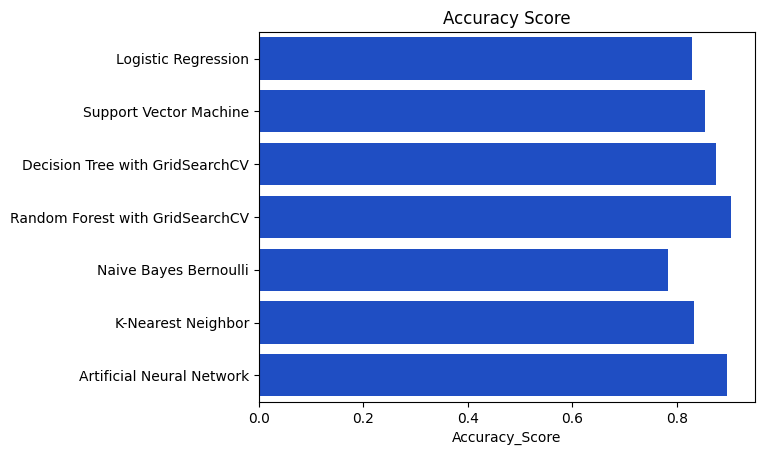

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Accuracy_Score and Models are defined lists or arrays
sns.barplot(x=Accuracy_Score, y=Models, color="xkcd:blue")
plt.xlabel('Accuracy_Score')
plt.title('Accuracy Score')
plt.show()


In [ ]:
#The most important features selected are Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager.

#For training the data and predicting the target, algorithms used are Logistic Regression,
#Support Vector Machine,
#Decision Tree,
#Random Forest,
#Naive Bayes,
#K-Nearest Neighbor and
#Artificial Neural Network.

In [ ]:
#Results¶
#Random Forest with GridSearchCV gives 94% accuracy.

In [ ]:
#It is observed that the maximum accuracy is obtained when we used Random Forest with GridSearchCV which is 94%.
# Decision tree and Artificial neural networks also yielded an accuracy of 92.5%.